# Notebook Set-up

In [17]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from collections import Counter

# Raw Data

In [3]:
raw_data = pd.read_csv(r'C:\Users\ibrah\Desktop\Projects\review-sentiment-analysis\data\IMDB Dataset.csv')

In [4]:
raw_data

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

# Exploratory analysis

In [5]:
# Get info about the dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
# Check for missing values
raw_data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
# Get basic statistics
raw_data.describe(include='all')

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [8]:
# Check sentiment distribution
raw_data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

# Cleaning

In [17]:
import logging

# Set up basic logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [18]:
# Function to clean the text data (removing punctiation, lowercase, lemmaisation and removing stopwords)
nltk.download("stopwords")
nltk.download("wordnet")

def preprocess(text):
    text = re.sub(r"[^a-zA-Z]", " ", text).lower()
    logging.info(f"Lowercase done")
    tokens = text.split()
    tokens = [t for t in tokens if t not in stopwords.words("english")]
    logging.info(f"Lowercase done")
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    logging.info(f"lemmarisation done")
    
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibrah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ibrah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Apply the cleaning function to the review column
# cleaned_data = raw_data.copy()
# cleaned_data['review'] = cleaned_data['review'].apply(preprocess)
# cleaned_data

2025-05-24 22:38:59,415 - INFO - Lowercase done
2025-05-24 22:38:59,457 - INFO - Lowercase done
2025-05-24 22:38:59,458 - INFO - lemmarisation done
2025-05-24 22:38:59,458 - INFO - Lowercase done
2025-05-24 22:38:59,480 - INFO - Lowercase done
2025-05-24 22:38:59,481 - INFO - lemmarisation done
2025-05-24 22:38:59,481 - INFO - Lowercase done
2025-05-24 22:38:59,503 - INFO - Lowercase done
2025-05-24 22:38:59,504 - INFO - lemmarisation done
2025-05-24 22:38:59,504 - INFO - Lowercase done
2025-05-24 22:38:59,523 - INFO - Lowercase done
2025-05-24 22:38:59,523 - INFO - lemmarisation done
2025-05-24 22:38:59,524 - INFO - Lowercase done
2025-05-24 22:38:59,555 - INFO - Lowercase done
2025-05-24 22:38:59,556 - INFO - lemmarisation done
2025-05-24 22:38:59,556 - INFO - Lowercase done
2025-05-24 22:38:59,573 - INFO - Lowercase done
2025-05-24 22:38:59,574 - INFO - lemmarisation done
2025-05-24 22:38:59,574 - INFO - Lowercase done
2025-05-24 22:38:59,597 - INFO - Lowercase done
2025-05-24 22:38

review sentiment
0      one reviewer mentioned watching oz episode hoo...  positive
1      wonderful little production br br filming tech...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically family little boy jake think zombie ...  negative
4      petter mattei love time money visually stunnin...  positive
...                                                  ...       ...
49995  thought movie right good job creative original...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary school nu...  negative
49998  going disagree previous comment side maltin on...  negative
49999  one expects star trek movie high art fan expec...  negative

[50000 rows x 2 columns]

In [24]:
cleaned_data = cleaned_data.drop_duplicates()

In [25]:
cleaned_data.to_pickle('cleaned_data.pkl')

In [2]:
cleaned_data = pd.read_pickle('cleaned_data.pkl')
cleaned_data

review sentiment
0      one reviewer mentioned watching oz episode hoo...  positive
1      wonderful little production br br filming tech...  positive
2      thought wonderful way spend time hot summer we...  positive
3      basically family little boy jake think zombie ...  negative
4      petter mattei love time money visually stunnin...  positive
...                                                  ...       ...
49995  thought movie right good job creative original...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  catholic taught parochial elementary school nu...  negative
49998  going disagree previous comment side maltin on...  negative
49999  one expects star trek movie high art fan expec...  negative

[49576 rows x 2 columns]

# Exploratary analysis - clean version

In [27]:
# Get info about the dataset
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49576 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49576 non-null  object
 1   sentiment  49576 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [28]:
# Check for missing values
cleaned_data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [29]:
# Get basic statistics
cleaned_data.describe(include='all')

review sentiment
count                                               49576     49576
unique                                              49576         2
top     one expects star trek movie high art fan expec...  positive
freq                                                    1     24880

In [30]:
# Check sentiment distribution
cleaned_data['sentiment'].value_counts()

sentiment
positive    24880
negative    24696
Name: count, dtype: int64

In [3]:
# Add a column that counts the number of words in the 'review' column
data_with_word_count = cleaned_data.copy()
data_with_word_count['review_word_count'] = data_with_word_count['review'].str.split().apply(len)
data_with_word_count

review sentiment  \
0      one reviewer mentioned watching oz episode hoo...  positive   
1      wonderful little production br br filming tech...  positive   
2      thought wonderful way spend time hot summer we...  positive   
3      basically family little boy jake think zombie ...  negative   
4      petter mattei love time money visually stunnin...  positive   
...                                                  ...       ...   
49995  thought movie right good job creative original...  positive   
49996  bad plot bad dialogue bad acting idiotic direc...  negative   
49997  catholic taught parochial elementary school nu...  negative   
49998  going disagree previous comment side maltin on...  negative   
49999  one expects star trek movie high art fan expec...  negative   

       review_word_count  
0                    168  
1                     92  
2                     88  
3                     70  
4                    133  
...                  ...  
49995                 81  
49996                 61  
49997                117  
49998                112  
49999                 68  

[49576 rows x 3 columns]

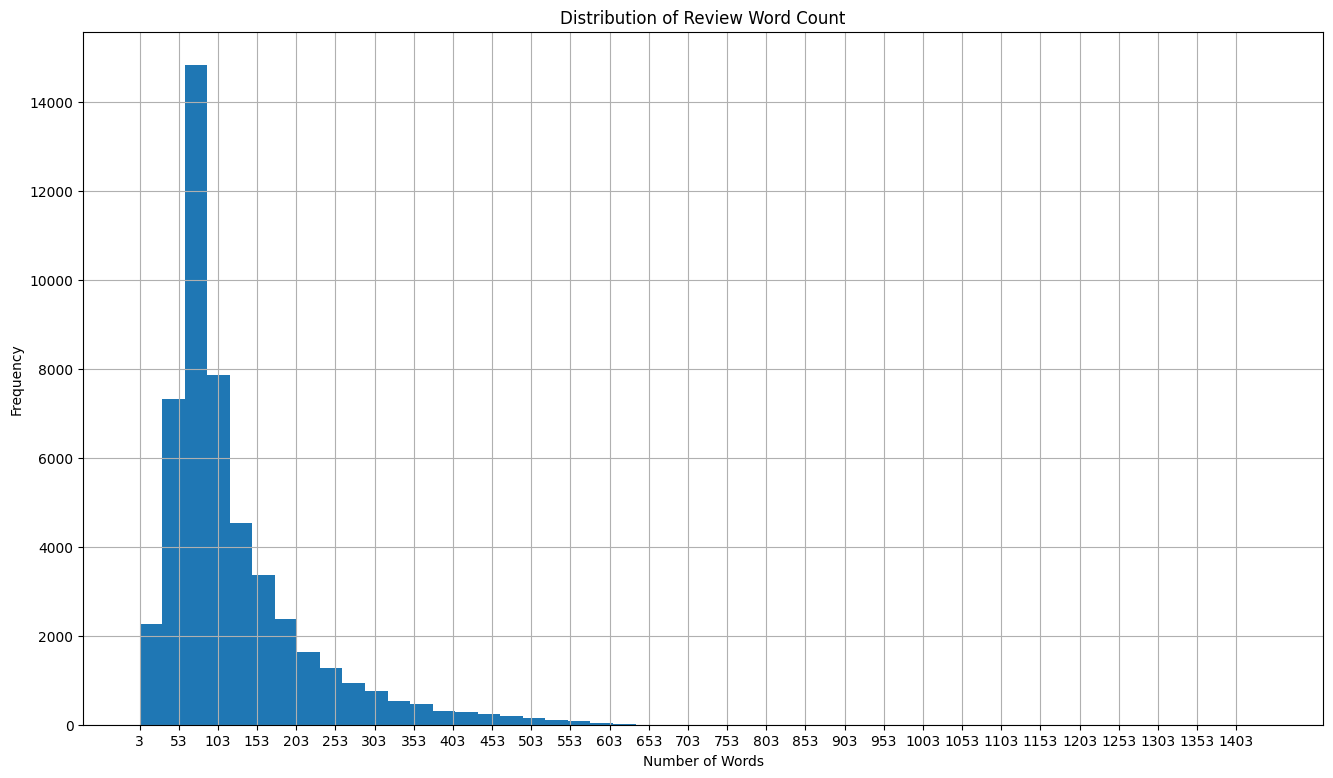

In [16]:
plt.figure(figsize=(16,9))
ax = data_with_word_count['review_word_count'].hist(bins=50)
plt.title('Distribution of Review Word Count')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xticks(
    ticks=range(
        int(data_with_word_count['review_word_count'].min()),
        int(data_with_word_count['review_word_count'].max())+1,
        50  # Set tick interval to 10, adjust as needed
    )
)
plt.show()

In [11]:
data_with_word_count['review_word_count'].describe()

count    49576.000000
mean       122.299964
std         92.636798
min          3.000000
25%         65.000000
50%         90.000000
75%        149.000000
max       1442.000000
Name: review_word_count, dtype: float64

In [13]:
# Group by review_word_count, aggregate by count, and order by count descending
review_length_distribution = (
    data_with_word_count.groupby('review_word_count')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)
review_length_distribution

review_word_count  count
61                  64    694
60                  63    684
62                  65    669
59                  62    646
63                  66    630
..                 ...    ...
615                955      1
616               1174      1
617               1175      1
618               1182      1
619               1442      1

[620 rows x 2 columns]

In [21]:
# Combine all reviews into one string, split into words
all_words = ' '.join(cleaned_data['review']).split()

# Count frequency of each word
word_counts = Counter(all_words)

# Convert to DataFrame for easy viewing
word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
word_counts_df.head(50) # Show top 20 most common words

word   count
10           br  200400
273       movie  102484
283        film   92812
0           one   55032
291        like   40786
141        time   31205
366        good   29656
216   character   28119
388       story   25110
218        even   24666
114         get   24465
77        would   24400
282        make   24045
161         see   23861
178      really   22921
16        scene   21298
115        well   21280
608        much   19152
486         bad   18290
322      people   18201
174       great   18096
498        also   17850
11        first   17436
22         show   17144
202         way   17090
12        thing   16365
511        made   16003
177        life   15514
823       could   15421
268       think   15120
20           go   14623
342        know   14223
311       watch   14066
238        love   13726
212        plot   13522
152       actor   13486
1471        two   13429
59         many   13360
397        seen   13265
240        year   13166
78          say   12927
535         end   12906
74        never   12880
365      acting   12767
348        look   12723
358        best   12555
135      little   12322
94         ever   11939
777         man   11825
577      better   11345

In [23]:
word_counts_df['count'].describe()

count     89823.000000
mean         67.501008
std         996.628085
min           1.000000
25%           1.000000
50%           2.000000
75%          12.000000
max      200400.000000
Name: count, dtype: float64

In [25]:
word_count_distribution = (
    word_counts_df.groupby('count')
    .size()
    .reset_index(name='groupby_count')
    .sort_values(by='count', ascending=False)
)
word_count_distribution

count  groupby_count
1729  200400              1
1728  102484              1
1727   92812              1
1726   55032              1
1725   40786              1
...      ...            ...
4          5           2854
3          4           3885
2          3           5820
1          2          10481
0          1          34976

[1730 rows x 2 columns]

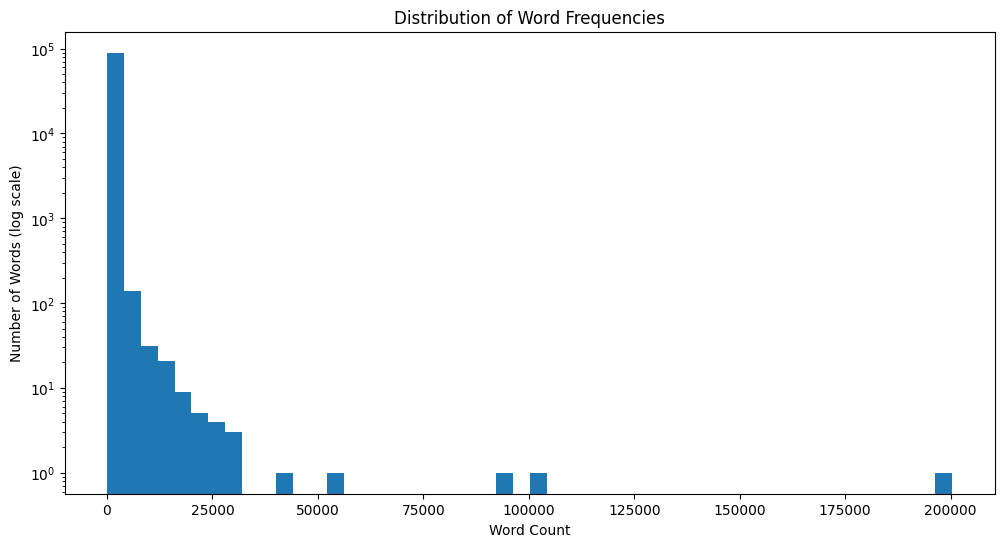

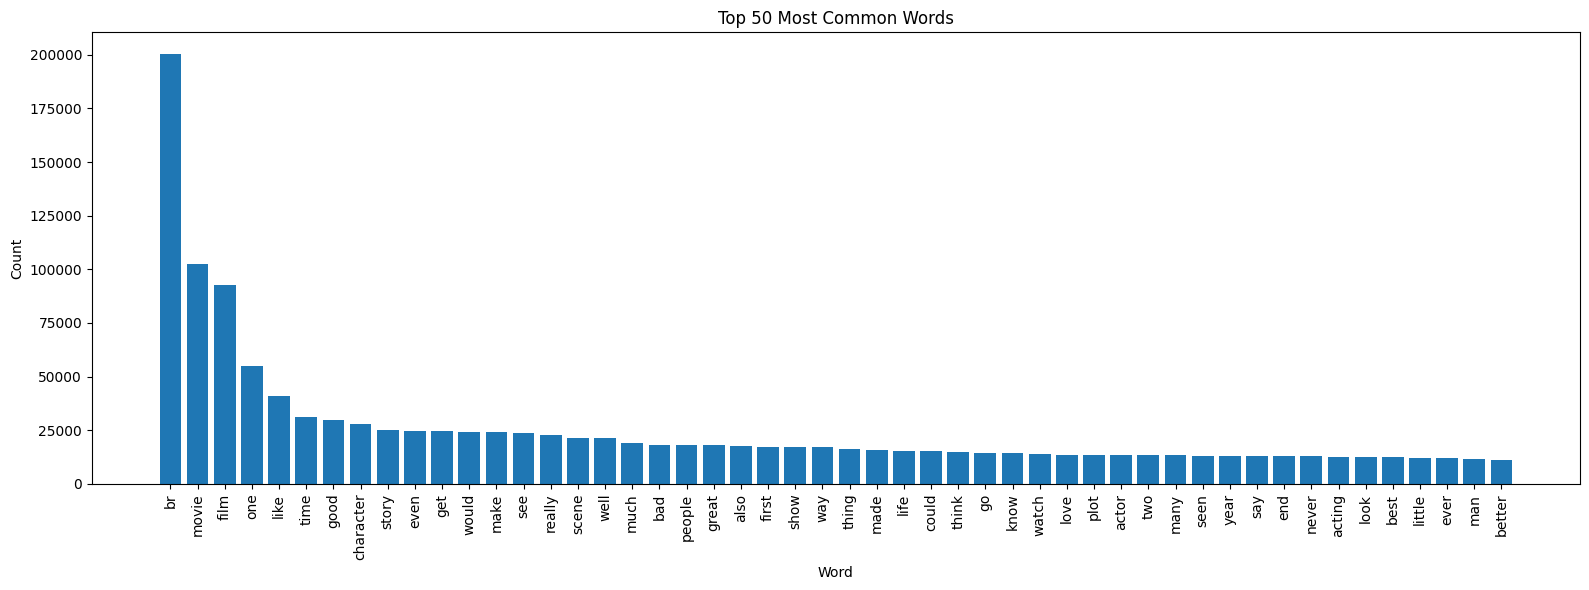

In [28]:
# Plot the top 50 most common words as a bar chart
top_50 = word_counts_df.head(50)
plt.figure(figsize=(16, 6))
plt.bar(top_50['word'], top_50['count'])
plt.title('Top 50 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

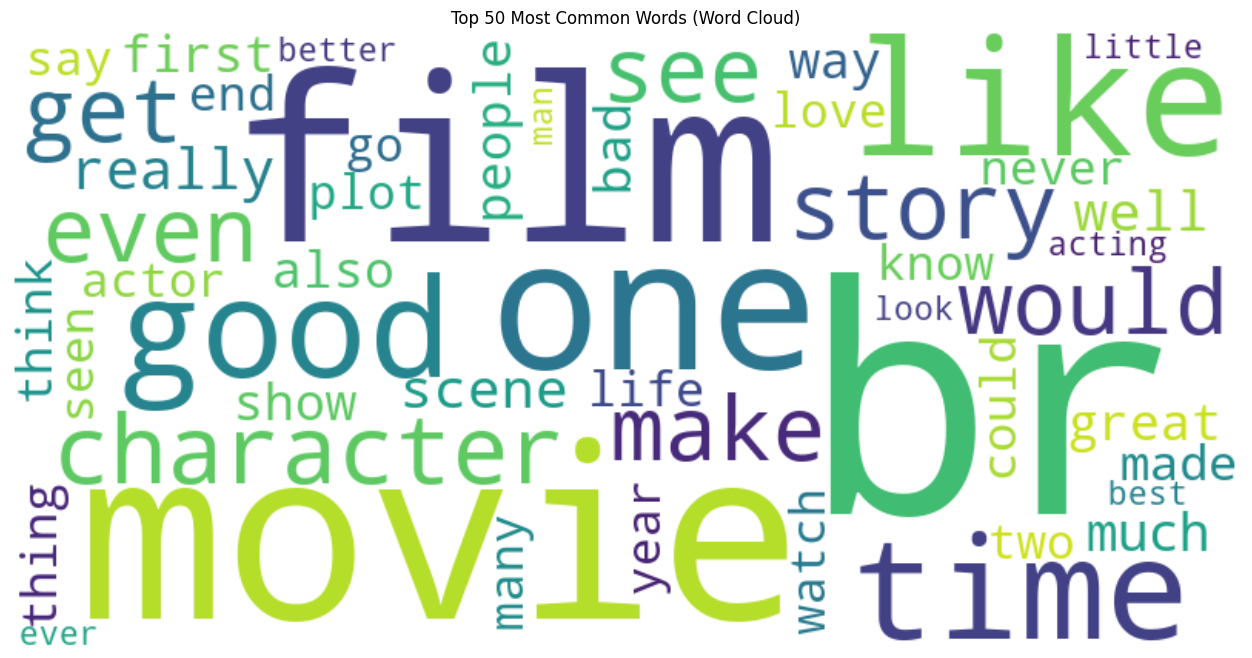

In [31]:
from wordcloud import WordCloud

# Generate a word cloud for the top 50 most common words
top_50_words = dict(word_counts_df.head(50).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_50_words)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 50 Most Common Words (Word Cloud)')
plt.show()

remove BR from cleaned_data